<a href="https://colab.research.google.com/github/harita-gr/ICTACK-AI-ML/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02

The diabetes dataset is given. The objective is to predict based on diagnostic
measurements whether a patient has diabetes.


## Step 1: Import all necessary libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Read the data file

In [21]:
data = pd.read_csv("/content/diabetes.csv")

## Step 3: Perform some pre-processing on the data

3.1 Data Preperation

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3.2 Missing Value Analysis

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It has been mentioned in the problem that,

> The zeros in the dataset are actually nan values. Treat zeros as nan and impute them using any suitable methods.


So, replacing all occurrences of the value `0` with with `NaN`

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

3.3 Replace all missing values with the median value of that attribute.

In [22]:
# Calculate the median for each attribute
median_values = data.median()

# Replace missing values with the median of each attribute
data = data.fillna(median_values)

# Check if missing values are filled
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


3.4 Data reduction by dropping unwanted attributes


*   Pregnancies
*   SkinThickness
*   DiabetesPedigreeFunction



In [23]:
data.drop(['Pregnancies','SkinThickness','DiabetesPedigreeFunction'], axis=1, inplace = True)

In [24]:
data.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


3.5 Plotting the data

1. Correleation Heatmap

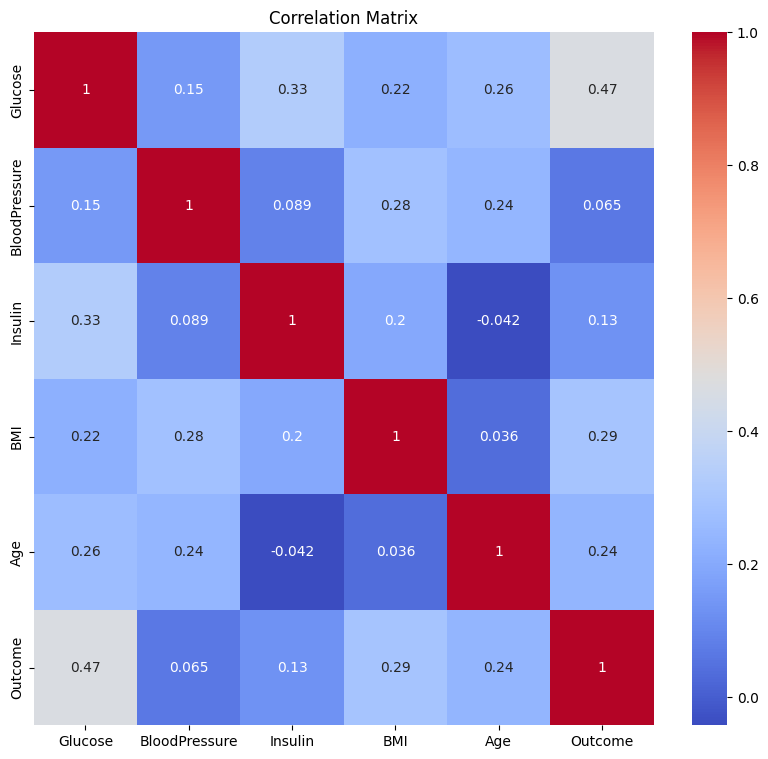

In [50]:
data.corr()
plt.figure(figsize = (10,9))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

3. Histogram showing Glucose Level Frequency

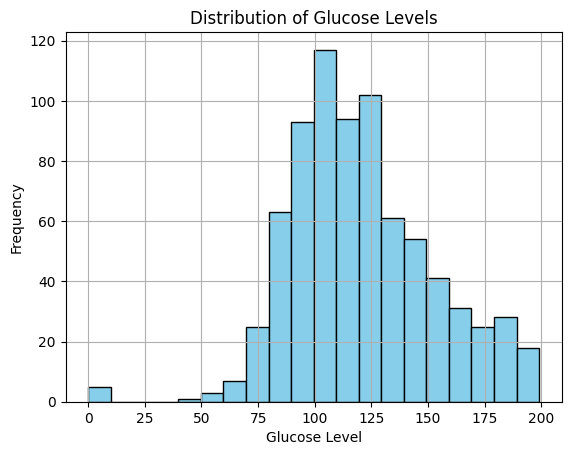

In [52]:
plt.hist(data['Glucose'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels')
plt.grid(True)
plt.show()

2. Pair Plot

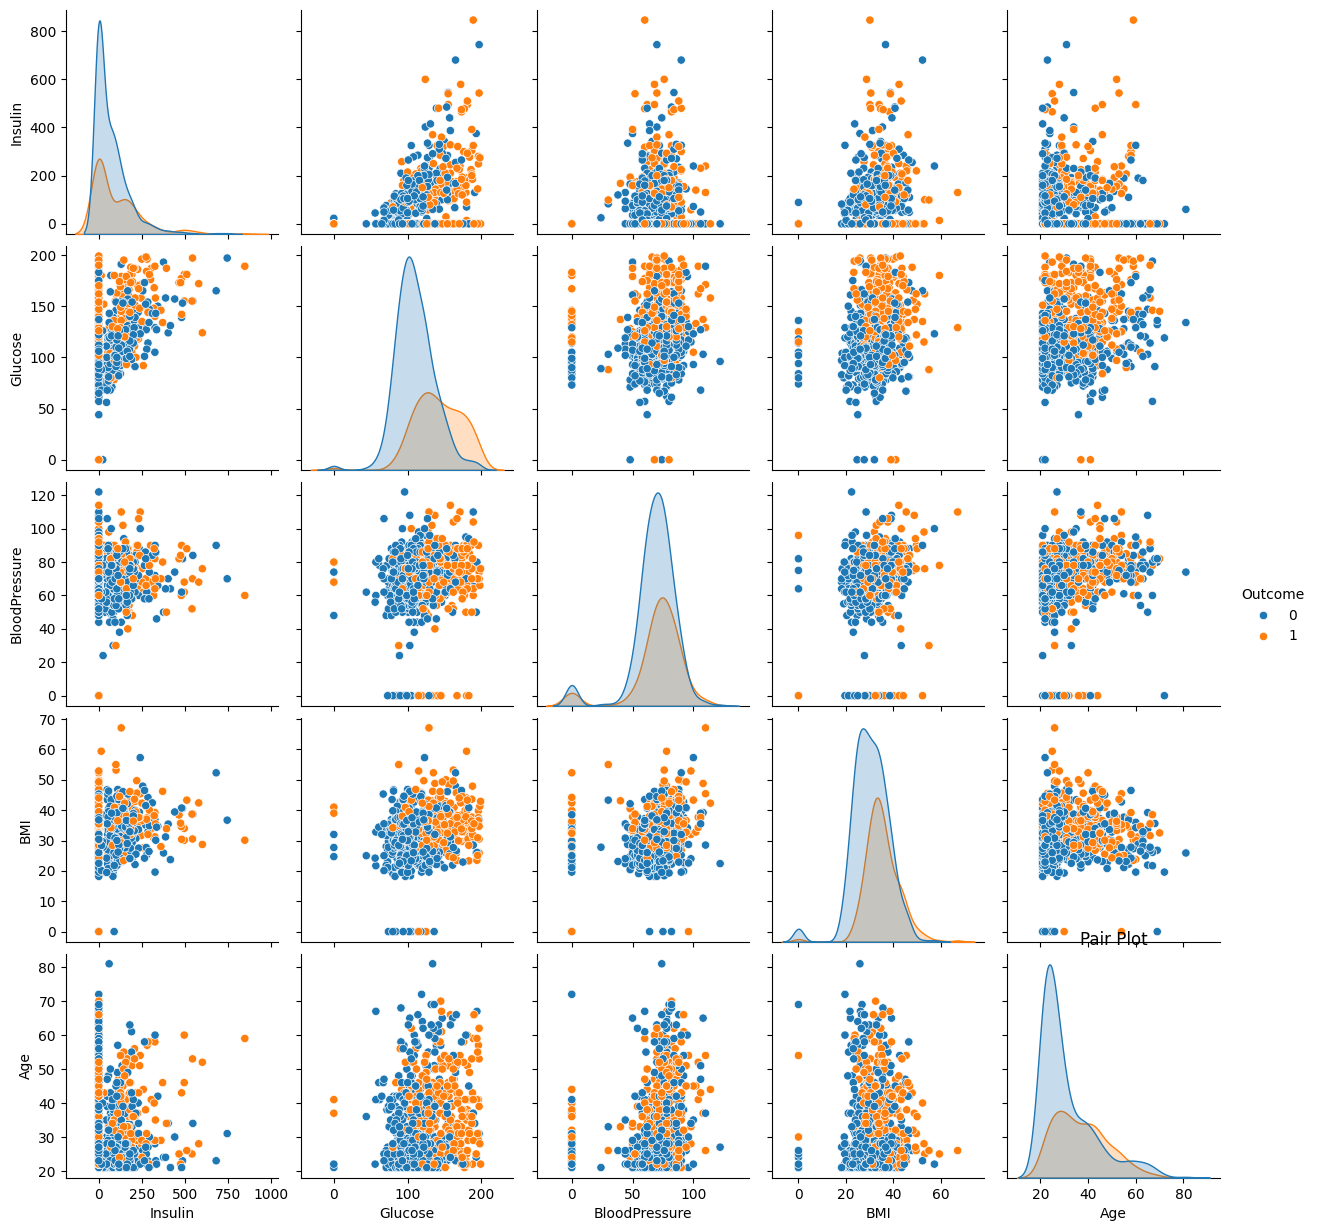

In [51]:
sns.pairplot(data, hue="Outcome", vars = ['Insulin', 'Glucose','BloodPressure', 'BMI','Age'])
plt.title('Pair Plot')
plt.show()

## Step 4: Split the Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop(['Outcome'], axis=1)  # Features (all columns except 'Outcome')
y = data['Outcome']  # Target variable ('Outcome' column)

In [27]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
X.head()

,Glucose,BloodPressure,Insulin,BMI,Age
0,148,72,0,33.6,50
1,85,66,0,26.6,31
2,183,64,0,23.3,32
3,89,66,94,28.1,21
4,137,40,168,43.1,33


In [30]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 5)
X_test shape: (154, 5)
y_train shape: (614,)
y_test shape: (154,)


## Step 5: Model Selection - Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

5.1 Initialize the Logistic Regression model

In [40]:
logistic_reg_model = LogisticRegression()

5.2 Train the model on the training data


In [38]:
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

5.3 Making predictions on the testing data

In [43]:
y_pred = logistic_reg_model.fit(X_train, y_train).predict(X_test)

5.4 Evaluate the model

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


In [45]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[80 19]
 [20 35]]


## Step 6: Retesing after Scaling the data

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

In [48]:
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model on the scaled training data
logistic_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_scaled = logistic_reg_model.predict(X_test_scaled)

In [49]:
# Evaluate the model on the scaled testing data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy (after scaling):", accuracy_scaled)

# Print classification report
print("Classification Report (after scaling):")
print(classification_report(y_test, y_pred_scaled))

# Print confusion matrix
print("Confusion Matrix (after scaling):")
print(confusion_matrix(y_test, y_pred_scaled))

Accuracy (after scaling): 0.7467532467532467
Classification Report (after scaling):
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix (after scaling):
[[80 19]
 [20 35]]


**Outcome**: *Scaling had no significant impact on the result.*